In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import tur_calculator as tc
import plotting_machine as pm



In [ ]:
#Coulumb diamonds

#--SETUP: ---------------------------------------------------------------------------------
VBs = np.linspace(-200,200, 400) # np.linspace(-10000,10000, 100)
epsilons = np.linspace(-500, 50, 400) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I, I_var, J_QH, P, P_0 = vs.run_sweep(VBs, epsilons, **INPUT)

In [3]:
#Beräkna TUR ("coulumb diamonds")
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I, I_var=I_var, J_QH=J_QH, P=P)
print(np.sort(TUR[~np.isnan(TUR)]))

[-78.30237684 -14.6259319  -12.99813948   2.01980299   2.18173785
   2.3053386    2.4712155    2.66722369   2.88055758   3.40482041
   3.67437005   3.96128095   4.27211803   5.56104766   5.81846693
   5.89552112   7.593811     9.31196142   9.65613786   9.82310415
  10.69014876  11.37973265  11.58883701  11.72431178  12.75873256
  13.44819939  13.79310476  14.83049906  15.51724458  16.48865363
  16.90850495  18.23880985  18.96551181  20.68777266  21.03447054
  21.18905016  23.01521341  23.10322678  25.17241131  30.3470268
  32.40561948  33.06322926  34.87499091 251.08873966 342.01442868
 599.61383805]


In [ ]:
#Zooma in:

#--SETUP: ---------------------------------------------------------------------------------
VBs_zoom = np.linspace(-30,30, 400) # np.linspace(-10000,10000, 100)
epsilons_zoom = np.linspace(-40, 40, 400) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I_zoom, I_var_zoom, J_QH_zoom, P_zoom, _ = vs.run_sweep(VBs_zoom, epsilons_zoom, **INPUT)

Text(0, 0.5, '$V_B$')

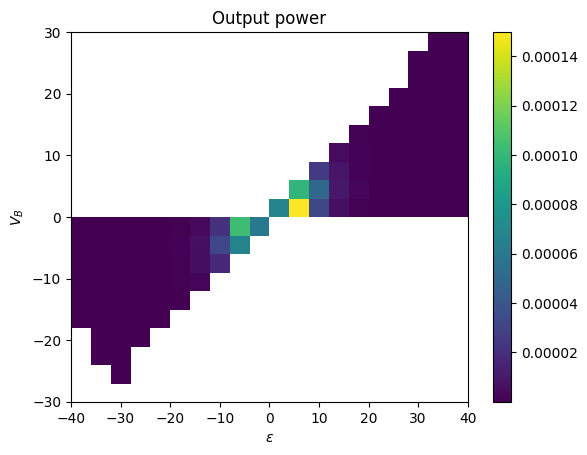

In [51]:
#Plotta power (för test)
P_zoom_masked = np.ma.masked_where(P_zoom <= 0, P_zoom)

plt.imshow(P_zoom_masked, extent=[epsilons_zoom[0], epsilons_zoom[-1], VBs_zoom[0], VBs_zoom[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.title(r"Output power")
plt.xlabel(r"$\epsilon$")
plt.ylabel('$V_B$')

In [52]:
#Beräkna TUR (zoomed in)
importlib.reload(tc)
TUR_zoom, eff_carnot_zoom, eff_zoom, sigma_zoom = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I_zoom, I_var=I_var_zoom, J_QH=J_QH_zoom, P=P_zoom)
print(np.sort(TUR_zoom[~np.isnan(TUR_zoom)]))

[  1.99943731   2.00196857   2.00445044   2.02876919   2.03638148
   2.03729047   2.10056768   2.10265058   2.19919225   2.19954766
   2.32570336   2.32575535   2.47917484   2.47928911   2.65738067
   2.66692122   2.85773792   2.85908227   3.05317381   3.07759776
   3.28638349   3.31225238   3.3143731    3.56248175   3.56539633
   3.77273904   3.82875068   3.82907329   4.10274118   4.10279993
   4.38489745   4.38694168   4.67393217   4.8842384    4.96857019
   5.17316498   5.26026946   5.26772277   5.56033091   5.56975214
   5.87505459   5.87604707   6.18390587   6.1840206    6.49368587
   6.49429401   6.80477126   6.86603977   7.11693383   7.4299388
   7.71682784   7.74163885   8.05499416   8.05756443   8.37202037
   8.37229287   8.68711892   8.6873304    9.00221623   9.02050923
   9.31746356   9.63284066  10.25725196  10.26340158  10.57880934
  10.5794444   10.8950702   10.89519595  11.21082028  11.21629464
  11.32793191  11.52654009  11.84227314  12.10068183  12.78801039
  12.789442

200.0


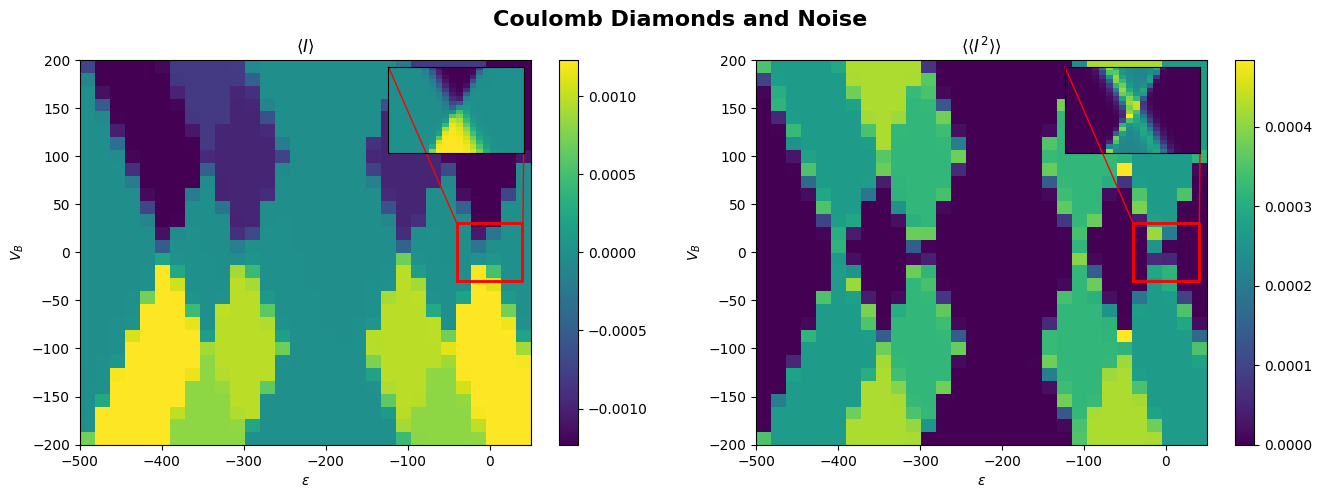

'\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))\n\n# Plot on different subplots using the axes array\nimg = axes[0].imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect=\'auto\', origin=\'lower\')\nfig.colorbar(img, ax=axes[0]) \naxes[0].set_title("Current")\naxes[0].set_xlabel(\'epsilon\')\naxes[0].set_ylabel(\'V\')\n#img.set_clim(-0.1, 0.1)  # Set color limits\n\nimg = axes[1].imshow(I_var, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect=\'auto\', origin=\'lower\')\n\nfig.colorbar(img, ax=axes[1]) \naxes[1].set_xlabel(\'epsilon\')\naxes[1].set_ylabel(\'V\')\n\nfig.suptitle("Coulomb Diamonds and Noise", fontsize=16, fontweight=\'bold\')\n# Adjust layout to prevent overlap\n#plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for suptitle\n\nplt.show()\n'

In [53]:
#Plotting

# Create Figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
print(VBs[-1])

# Main imshow plot
img = axes[0].imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
fig.colorbar(img, ax=axes[0])
axes[0].set_title(r"$\langle I \rangle$")
axes[0].set_xlabel(r"$\epsilon$")
axes[0].set_ylabel('$V_B$')

# Define zoom area (e.g., focus on a small square region)
eps_min, eps_max = epsilons_zoom[0], epsilons_zoom[-1]   #0, 2.1  # Epsilon range
v_min, v_max = VBs_zoom[0], VBs_zoom[-1] #-0.5, 0.5  # V range
# Inset plot (zoomed-in square)

inset_width = 0.3  # 30% of the parent axes
inset_height = inset_width * (v_max - v_min) / (eps_max - eps_min)  # Maintain aspect ratio

# Create the inset at a specific position
axins = inset_axes(axes[0], width=f"{inset_width*100}%", height=f"{inset_height*100}%", loc="upper right")
#axins = inset_axes(axes[0], width="30%", height="30%", loc="upper right")  # Size of the inset
# High-res zoomed-in plot
img_zoom = axins.imshow(I_zoom, extent=[eps_min, eps_max, v_min, v_max], aspect='auto', origin='lower')
axins.set_xticks([])  # Remove ticks for clarity
axins.set_yticks([])

# Compute the correct aspect ratio
#aspect_ratio = (eps_max - eps_min) / (v_max - v_min)
#axins.set_aspect(aspect_ratio)  # Force correct aspect ratio

# Mark the zoomed region with a rectangle
axes[0].plot([eps_min, eps_max, eps_max, eps_min, eps_min], [v_min, v_min, v_max, v_max, v_min], 'r-', linewidth=2)
# Connect main plot and inset with lines
mark_inset(axes[0], axins, loc1=2, loc2=4, fc="none", ec="red")

img = axes[1].imshow(I_var, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
fig.colorbar(img, ax=axes[1]) 
axes[1].set_title(r"$\langle\langle I^2 \rangle\rangle$")
axes[1].set_xlabel(r"$\epsilon$")
axes[1].set_ylabel('$V_B$')

inset_width = 0.3  # 30% of the parent axes
inset_height = inset_width * (v_max - v_min) / (eps_max - eps_min)  # Maintain aspect ratio

# Create the inset at a specific position
axins = inset_axes(axes[1], width=f"{inset_width*100}%", height=f"{inset_height*100}%", loc="upper right")

#axins = inset_axes(axes[1], width="30%", height="30%", loc="upper right")  # Size of the inset
img_zoom = axins.imshow(I_var_zoom, extent=[eps_min, eps_max, v_min, v_max], aspect='auto', origin='lower')

# Compute the correct aspect ratio
#aspect_ratio = (eps_max - eps_min) / (v_max - v_min)
#axins.set_aspect(aspect_ratio)  # Force correct aspect ratio

axins.set_xticks([])  # Remove ticks for clarity
axins.set_yticks([])
axes[1].plot([eps_min, eps_max, eps_max, eps_min, eps_min], [v_min, v_min, v_max, v_max, v_min], 'r-', linewidth=2)
mark_inset(axes[1], axins, loc1=2, loc2=4, fc="none", ec="red")

fig.suptitle("Coulomb Diamonds and Noise", fontsize=16, fontweight='bold')
plt.show()

'''
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot on different subplots using the axes array
img = axes[0].imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
fig.colorbar(img, ax=axes[0]) 
axes[0].set_title("Current")
axes[0].set_xlabel('epsilon')
axes[0].set_ylabel('V')
#img.set_clim(-0.1, 0.1)  # Set color limits

img = axes[1].imshow(I_var, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')

fig.colorbar(img, ax=axes[1]) 
axes[1].set_xlabel('epsilon')
axes[1].set_ylabel('V')

fig.suptitle("Coulomb Diamonds and Noise", fontsize=16, fontweight='bold')
# Adjust layout to prevent overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for suptitle

plt.show()
'''


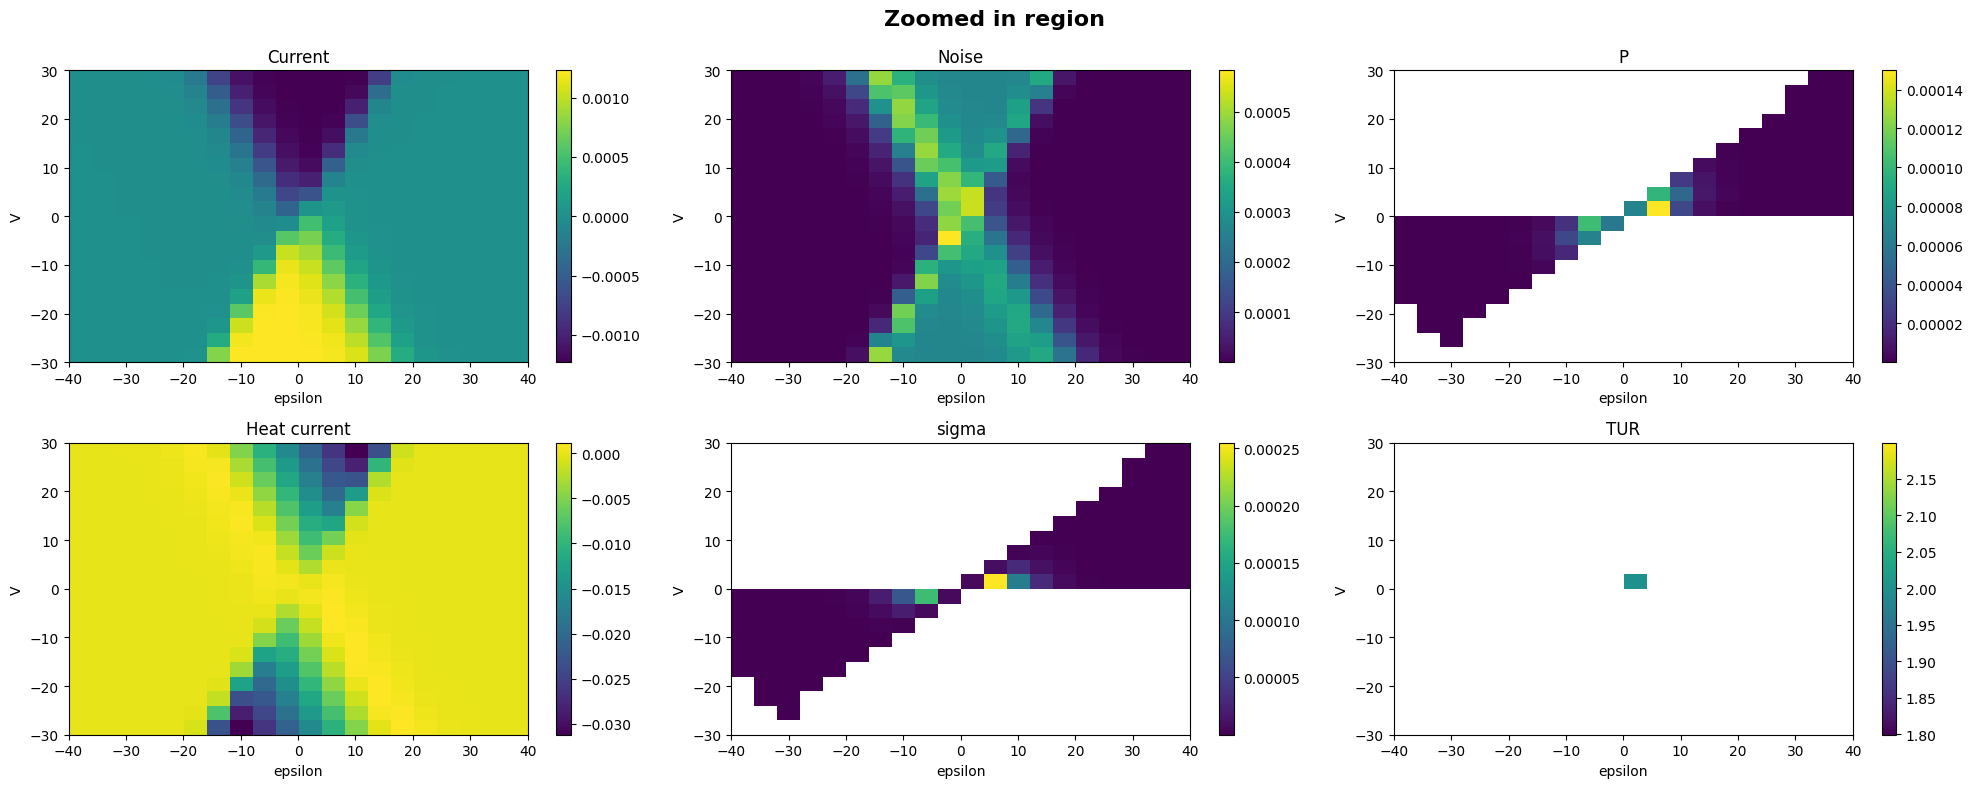

In [55]:
importlib.reload(pm)
pm.plot_all(epsilons_zoom, VBs_zoom, I_zoom, I_var_zoom, P_zoom, J_QH_zoom, sigma_zoom, TUR_zoom)

In [9]:
#ZOOMAR IN PÅ INTRESSANT OMRÅDE:
#(Detta ger TUR = 1.97)
'''
#--SETUP: ---------------------------------------------------------------------------------
VBs_zoom = np.linspace(0,0.5, 20) # np.linspace(-10000,10000, 100)
epsilons_zoom = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I, I_var, J_QH, P, P_0 = vs.run_sweep(VBs_zoom, epsilons_zoom, **INPUT)
'''

"\n#--SETUP: ---------------------------------------------------------------------------------\nVBs_zoom = np.linspace(0,0.5, 20) # np.linspace(-10000,10000, 100)\nepsilons_zoom = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)\n#T = 1\nT_L = 2.5 #100\nT_R = 1 #T_L\n\nINPUT = {\n    'omega': 0.002, #1000\n    'u_intra': 200, #2000\n    'u_inter': 100, #1000\n    'gammaL': 0.005, #0.5\n    'gammaR': 0.005, #0.5\n    'T_L': T_L,\n    'T_R': T_R,\n}\n\n#--SETUP: ---------------------------------------------------------------------------------\n\nimportlib.reload(vs)\nI, I_var, J_QH, P, P_0 = vs.run_sweep(VBs_zoom, epsilons_zoom, **INPUT)\n"

In [10]:
'''
#Beräkna TUR
importlib.reload(tc)
TUR_zoom, eff_carnot_zoom, eff_zoom, sigma_zoom = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I_zoom, I_var=I_var_zoom, J_QH=J_QH_zoom, P=P_zoom)
print(np.sort(TUR_zoom[~np.isnan(TUR_zoom)]))
'''

'\n#Beräkna TUR\nimportlib.reload(tc)\nTUR_zoom, eff_carnot_zoom, eff_zoom, sigma_zoom = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I_zoom, I_var=I_var_zoom, J_QH=J_QH_zoom, P=P_zoom)\nprint(np.sort(TUR_zoom[~np.isnan(TUR_zoom)]))\n'